In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade pip

Requirement already up-to-date: sklearn in c:\users\mille\anaconda3\envs\pythondata\lib\site-packages (0.0)
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\mille\\AppData\\Local\\Temp\\pip-uninstall-cryolv50\\pip.exe'
Consider using the `--user` option or check the permissions.



In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df = df[df.koi_disposition!="CANDIDATE"]

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
X = df.drop("koi_disposition", axis = 1)
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,0,1,0,0,21.513523,2.714000e-04,-2.714000e-04,132.335600,0.012200,-0.012200,...,-141,3.508,0.187,-0.153,3.318,0.665,-0.813,287.46786,37.966640,10.630
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
y = pd.get_dummies(df.koi_disposition)
y

,CONFIRMED,FALSE POSITIVE
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
6983,0,1
6986,0,1
6987,0,1
6989,0,1


In [6]:
print(X.shape, y.shape)

(5304, 40) (5304, 2)


In [7]:
# Create a Train Test Split

# Use `koi_disposition` for the y values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.CONFIRMED)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
280,0,1,0,0,4.800654,0.000004,-0.000004,134.365782,0.000745,-0.000745,...,-241,4.347,0.056,-0.224,1.241,0.441,-0.147,296.13391,38.999008,13.320
3401,0,0,0,0,13.227475,0.000133,-0.000133,137.717680,0.007930,-0.007930,...,-227,4.405,0.054,-0.216,1.155,0.376,-0.125,288.23175,50.567879,15.050
5062,0,1,0,0,2.873658,0.000003,-0.000003,132.584700,0.000850,-0.000850,...,-169,3.829,0.536,-0.134,2.287,0.521,-1.215,284.62463,39.178780,12.702
1478,0,0,0,0,9.991152,0.000059,-0.000059,134.393350,0.004510,-0.004510,...,-77,4.524,0.063,-0.018,0.796,0.027,-0.054,285.17334,48.770039,15.311
6455,0,1,0,0,1.559361,0.000004,-0.000004,132.539550,0.003300,-0.003300,...,-312,4.193,0.153,-0.187,1.488,0.428,-0.312,293.55844,41.395351,14.091


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.984
k: 3, Train/Test Score: 0.991/0.990
k: 5, Train/Test Score: 0.991/0.990
k: 7, Train/Test Score: 0.991/0.990
k: 9, Train/Test Score: 0.990/0.990
k: 11, Train/Test Score: 0.990/0.990
k: 13, Train/Test Score: 0.990/0.990
k: 15, Train/Test Score: 0.990/0.990
k: 17, Train/Test Score: 0.990/0.990
k: 19, Train/Test Score: 0.990/0.990


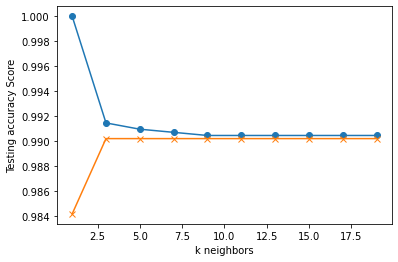

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [12]:
# Note that k: 3 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.990


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [15]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
model = knn
param_grid = params = [{'n_neighbors': [3, 5, 7, 9],
           'weights': ['uniform', 'distance'],
           'leaf_size': [15, 20]}]
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.989, total=   0.1s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.995, total=   0.1s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.986, total=   0.1s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.994, total=   0.1s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neigh

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid=[{'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 15, 'n_neighbors': 5, 'weights': 'uniform'}
0.9904475206219778


# Save the Model

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'K Nearest Neighbors.sav'
joblib.dump(grid.best_score_, filename)

['K Nearest Neighbors.sav']